In [0]:
# activate R magic
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [0]:
%%R
install.packages("googledrive")
install.packages(c("caret","e1071","rpart","randomForest","caTools","descr"), repos='http://cran.us.r-project.org')
library("googledrive")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘gargle’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/gargle_0.4.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 180886 bytes (176 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co

In [0]:
%%R
system("gdown --id 1XGXXoQkRIRzlfOJOgyPRqLWP3yd91A-j")
data = read.csv("bank_marketing_dataset.csv")
print(head(data))

  age         job marital education default balance housing loan  contact day
1  30  unemployed married   primary      no    1787      no   no cellular  19
2  33    services married secondary      no    4789     yes  yes cellular  11
3  35  management  single  tertiary      no    1350     yes   no cellular  16
4  30  management married  tertiary      no    1476     yes  yes  unknown   3
5  59 blue-collar married secondary      no       0     yes   no  unknown   5
6  35  management  single  tertiary      no     747      no   no cellular  23
  month duration campaign pdays previous poutcome  y
1   oct       79        1    -1        0  unknown no
2   may      220        1   339        4  failure no
3   apr      185        1   330        1  failure no
4   jun      199        4    -1        0  unknown no
5   may      226        1    -1        0  unknown no
6   feb      141        2   176        3  failure no


In [0]:
%%R
install.packages("ggplot")
library('ggplot2')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
%%R
summary(data)

      age                 job          marital         education    default   
 Min.   :19.00   management :969   divorced: 528   primary  : 678   no :4445  
 1st Qu.:33.00   blue-collar:946   married :2797   secondary:2306   yes:  76  
 Median :39.00   technician :768   single  :1196   tertiary :1350             
 Mean   :41.17   admin.     :478                   unknown  : 187             
 3rd Qu.:49.00   services   :417                                              
 Max.   :87.00   retired    :230                                              
                 (Other)    :713                                              
    balance      housing     loan           contact          day       
 Min.   :-3313   no :1962   no :3830   cellular :2896   Min.   : 1.00  
 1st Qu.:   69   yes:2559   yes: 691   telephone: 301   1st Qu.: 9.00  
 Median :  444                         unknown  :1324   Median :16.00  
 Mean   : 1423                                          Mean   :15.92  
 3rd Qu.

In [0]:
%%R
print(dim(data))
print(names(data))

[1] 4521   17
 [1] "age"       "job"       "marital"   "education" "default"   "balance"  
 [7] "housing"   "loan"      "contact"   "day"       "month"     "duration" 
[13] "campaign"  "pdays"     "previous"  "poutcome"  "y"        


[1] "categorical data analysis"


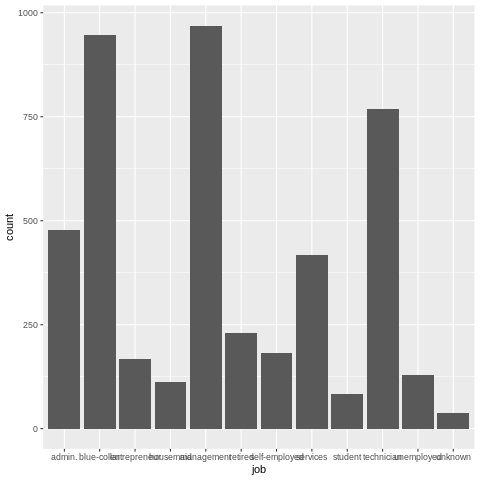

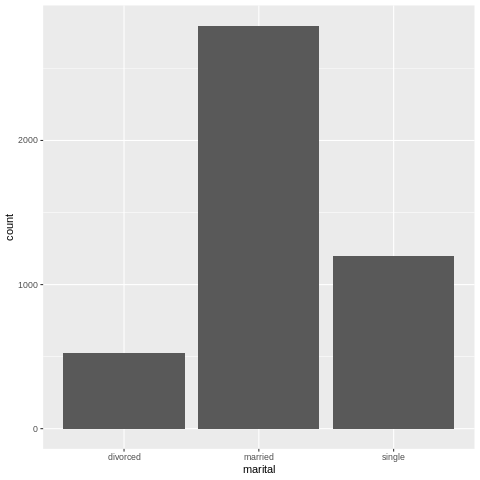

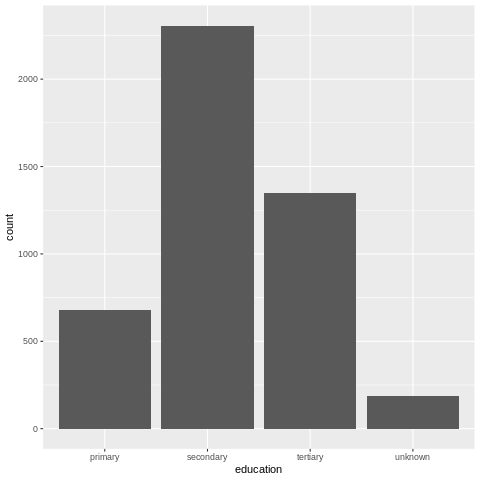

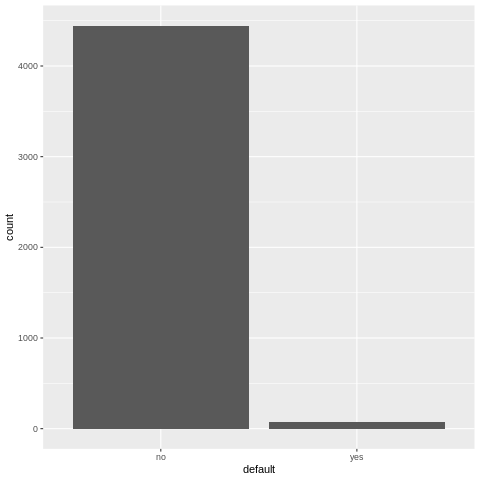

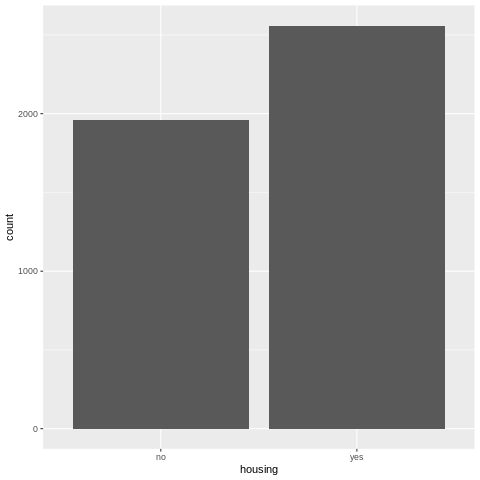

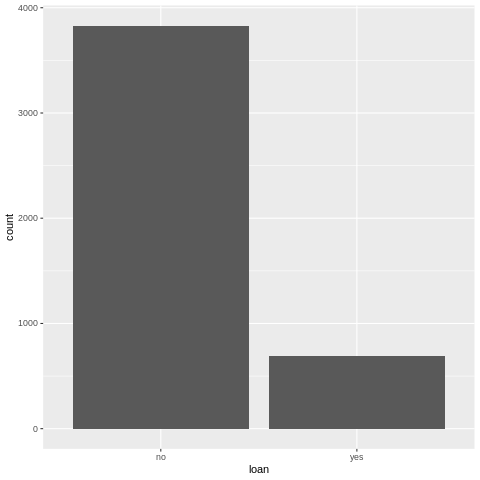

In [0]:
%%R

col <- list('job', 'marital', 'education', 'default' ,'housing' ,'loan')
print('categorical data analysis')
for (i in col) {
print(ggplot(data, aes_string(x=i)) + geom_histogram(binwidth=.4,stat ='count'))
}

minimum value : 4 
maximum value : 3025

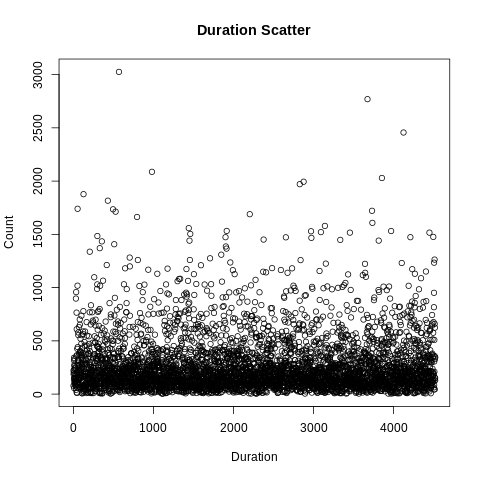

In [0]:
%%R
minn <- min(data$duration)
maxx <- max(data$duration)
cat('minimum value :', minn,'\n')
cat('maximum value :', maxx)
plot(data$duration,main="Duration Scatter",xlab="Duration",ylab="Count")

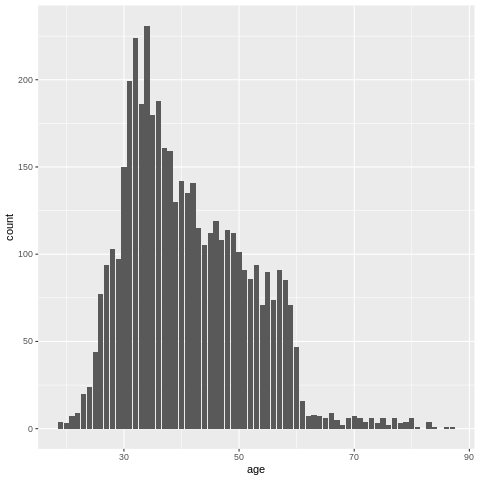

In [0]:
%%R
ggplot(data, aes(x=age)) + geom_histogram(binwidth=.4,stat ='count')

minimum value : 1 
maximum value : 50

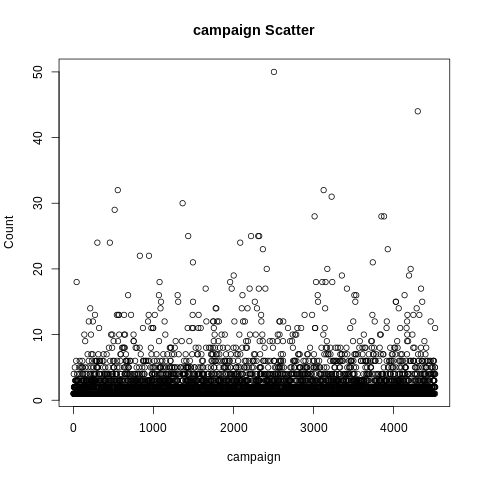

In [0]:
%%R
minn <- min(data$campaign)
maxx <- max(data$campaign)
cat('minimum value :', minn,'\n')
cat('maximum value :', maxx)
plot(data$campaign,main="campaign Scatter",xlab="campaign",ylab="Count")

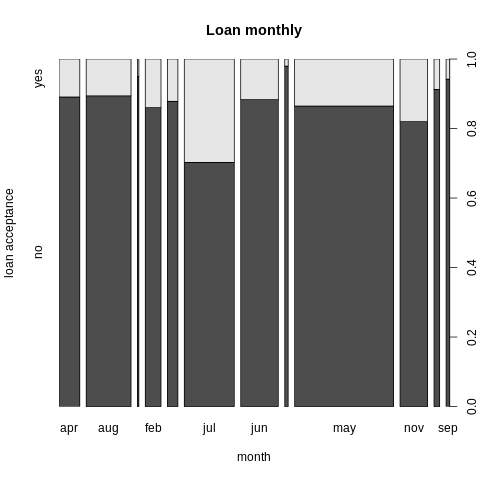

In [0]:
%%R
plot(data$month,data$loan,main="Loan monthly",xlab="month",ylab="loan acceptance") 

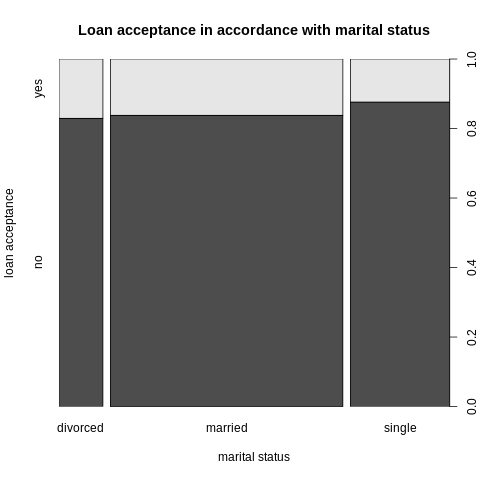

In [0]:
%%R
plot(data$marital,data$loan,main="Loan acceptance in accordance with marital status",xlab="marital status",ylab="loan acceptance") 

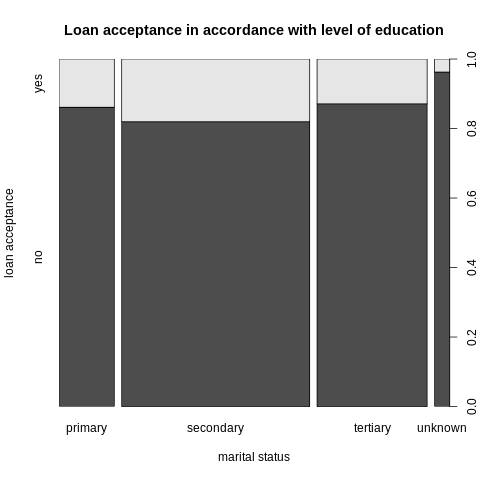

In [0]:
%%R
plot(data$education,data$loan,main="Loan acceptance in accordance with level of education",xlab="marital status",ylab="loan acceptance")

In [0]:
%%R
library('caret') 
library('e1071')
library('rpart')
library('randomForest')
library('caTools')
library('descr')

R[write to console]: Loading required package: lattice

R[write to console]: randomForest 4.6-14

R[write to console]: Type rfNews() to see new features/changes/bug fixes.

R[write to console]: 
Attaching package: ‘randomForest’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    margin




In [0]:
%%R
d = data


In [0]:
%%R
new_data = data.frame(as.numeric(as.factor(data$age)),
                                as.numeric(as.factor(data$job)),
                                as.numeric(as.factor(data$marital)),
                                as.numeric(as.factor(data$education)),
                                as.numeric(as.factor(data$housing)),
                                as.numeric(as.factor(data$loan)))


In [0]:
%%R
set.seed(2262)
sample <- sample.int(n = nrow(new_data), size = floor(.8*nrow(new_data)), replace = F)
train <- d[sample, ]
test  <- d[-sample, ]

In [0]:
%%R
bank.tree <-rpart(y ~ ., train , method = 'class')

In [0]:
%%R


#predict
y_hat <- predict( bank.tree , test , type = "class")
y_prob <- predict( bank.tree , test , type = "prob")


# Confusion matrix
confusionMatrix(y_hat , test$y)

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  758  77
       yes  31  39
                                          
               Accuracy : 0.8807          
                 95% CI : (0.8577, 0.9011)
    No Information Rate : 0.8718          
    P-Value [Acc > NIR] : 0.2296          
                                          
                  Kappa : 0.3574          
                                          
 Mcnemar's Test P-Value : 1.49e-05        
                                          
            Sensitivity : 0.9607          
            Specificity : 0.3362          
         Pos Pred Value : 0.9078          
         Neg Pred Value : 0.5571          
             Prevalence : 0.8718          
         Detection Rate : 0.8376          
   Detection Prevalence : 0.9227          
      Balanced Accuracy : 0.6485          
                                          
       'Positive' Class : no              
                              

In [0]:
%%R

CrossTable(test$y, y_hat,
           prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
           dnn = c('y', 'y hat'))

   Cell Contents 
|-------------------------|
|                       N | 
|         N / Table Total | 
|-------------------------|

         y hat
y           no     yes   Total
------------------------------
no         758      31     789
         0.838   0.034        
------------------------------
yes         77      39     116
         0.085   0.043        
------------------------------
Total      835      70     905
